In [1]:
%matplotlib  inline
from itertools import chain
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.patches as patches
import matplotlib.collections as collections
import shapefile

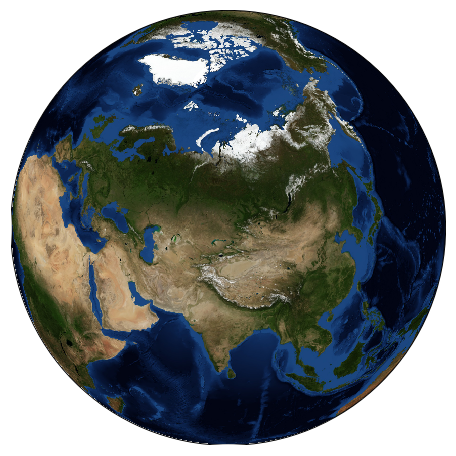

In [2]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=80)
m.bluemarble(scale=0.5)
plt.show()

Text(2.34727e+06,4.51808e+06,'Seattle')

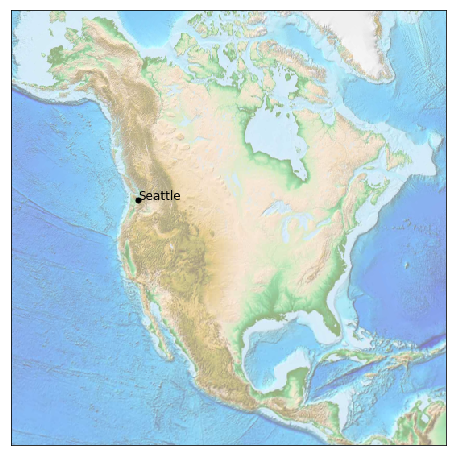

In [3]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(
    projection='lcc',
    resolution=None,
    width=8E6,
    height=8E6,
    lat_0=45,
    lon_0=-100
)
m.etopo(scale=0.5, alpha=0.5)
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, 'Seattle', fontsize=12)

In [4]:
def draw_map(m, scale=0.2):
    m.shadedrelief(scale=scale)
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

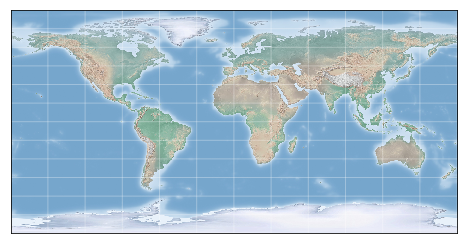

In [5]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(
    projection='cyl',
    resolution=None,
    llcrnrlat=-90,
    urcrnrlat=90,
    llcrnrlon=-180,
    urcrnrlon=180
)
draw_map(m)

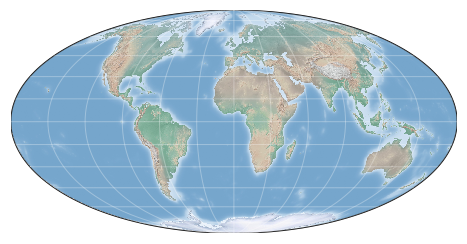

In [6]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None, lat_0=0, lon_0=0)
draw_map(m)

In [7]:
rus_adm_units = shapefile.Reader('unzip/RUS_adm1')

In [8]:
rus_adm_units_records = rus_adm_units.records()
print(rus_adm_units_records)
rus_adm_units_shapes = rus_adm_units.shapes()

[[188, 'RUS', 'Russia', 1, 'Adygey', 'RU.AD', 0, '0', 'Respublika', 'Republic', 'Республика Адыгея', 'Adygea|Adygeya|Adygheya|Republic of Adygeya|Adygeyskaya A.Obl.|Respublika Adygeya'], [188, 'RUS', 'Russia', 2, 'Altay', 'RU.AL', 0, '0', 'Kray', 'Territory', 'Алтайский край', 'Altayskiy Kray'], [188, 'RUS', 'Russia', 3, 'Amur', 'RU.AM', 0, '0', 'Oblast', 'Region', 'Амурская область', 'Amurskaya Oblast'], [188, 'RUS', 'Russia', 4, "Arkhangel'sk", 'RU.AR', 0, '0', 'Oblast', 'Region', 'Архангельская область', 'Arcangelo|Archangel|Archangelsk|Arkhangelskaya Oblast'], [188, 'RUS', 'Russia', 5, "Astrakhan'", 'RU.AS', 0, '0', 'Oblast', 'Region', 'Астраханская область', 'Astrachan|Astrakhanskaya Oblast'], [188, 'RUS', 'Russia', 6, 'Bashkortostan', 'RU.BK', 0, '0', 'Respublika', 'Republic', 'Республика Башкортостан', 'Bashkir|Bashkiriya|Bashkirskaya A.S.S.R.|Republic of Bashkortostan|Respublika Bashkortostan'], [188, 'RUS', 'Russia', 7, 'Belgorod', 'RU.BL', 0, '0', 'Oblast', 'Region', 'Белгоро

In [9]:
num_of_shapes = len(rus_adm_units_shapes)
c_n_s = []
for shape_num in range(num_of_shapes):
    c_n_s.append(rus_adm_units_records[shape_num][1])

In [10]:
c_n_s = np.array(c_n_s)
color_map = plt.get_cmap('Dark2')

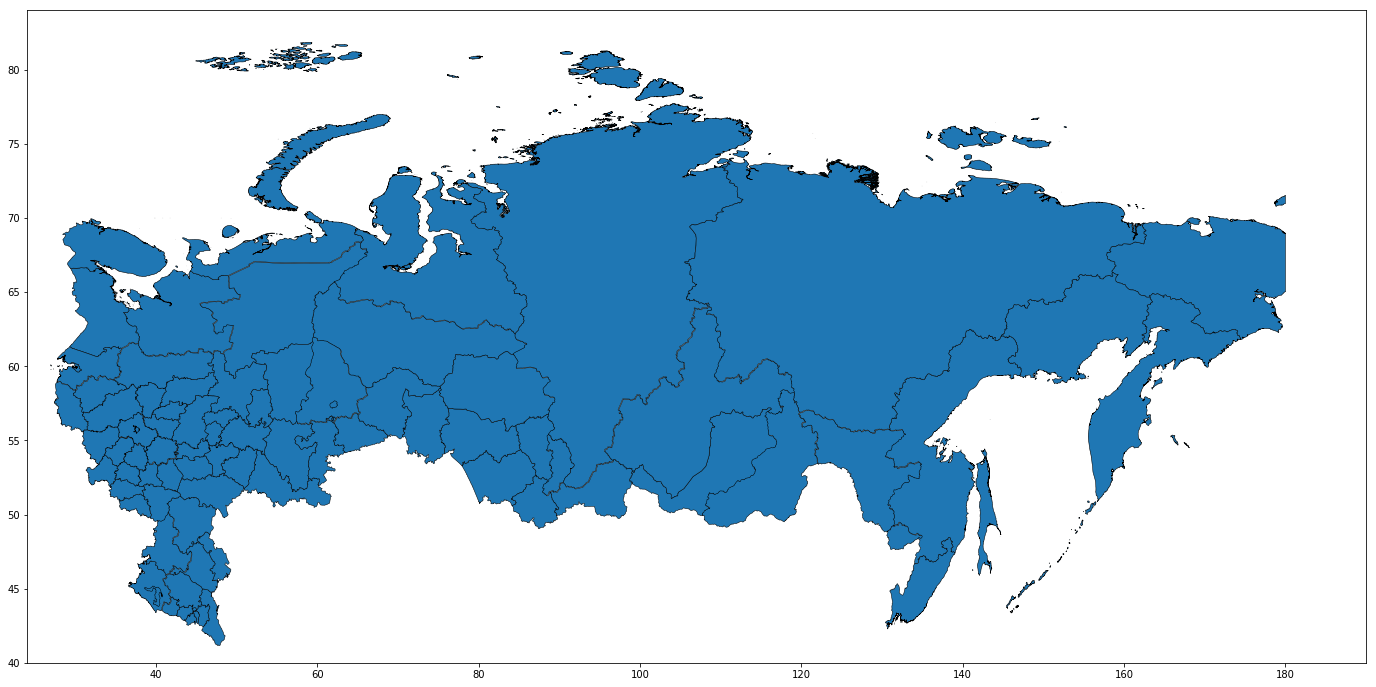

In [11]:
fig = plt.figure(figsize=(24, 12))
ax = fig.add_subplot(111)
for shape_num in range(num_of_shapes):
    patches_list = []
    points = np.array(rus_adm_units_shapes[shape_num].points)
    parts = rus_adm_units_shapes[shape_num].parts
    #print(dir(parts))
    #print(type(parts))
    #print(points.shape)
    #print()
    par = list(parts) + [points.shape[0]]

    for point_i_j in range(len(parts)):
        patches_list.append(patches.Polygon(points[par[point_i_j]:par[point_i_j + 1]]))
    ax.add_collection(collections.PatchCollection(patches_list, edgecolor='k', linewidths=.5))

ax.set_xlim(24, +190)
ax.set_ylim(40, 84)
plt.show()